# Image Classification -- CIFAR-10 -- Resnet34
> This notebook demonstrates various techniques of effective Neural Network models training using the Callbacks mechanism of FastAI library (v1).

[`CIFAR-10` dataset](https://course.fast.ai/datasets)


## Getting the Data

In [1]:
from fastai.vision import *
from fastai.callbacks import *

In [188]:
import fastai

In [189]:
fastai.__version__

'1.0.60.dev0'

In [95]:
%matplotlib inline

In [2]:
path = untar_data(URLs.CIFAR) 

In [3]:
np.random.seed(10)
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(get_transforms())
        .add_test_folder()
        .databunch(bs=128)
        .normalize(imagenet_stats))

In [4]:
data

ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
cat,cat,cat,cat,cat
Path: /home/condor/.fastai/data/cifar10;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
cat,airplane,deer,automobile,cat
Path: /home/condor/.fastai/data/cifar10;

Test: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: /home/condor/.fastai/data/cifar10

In [0]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

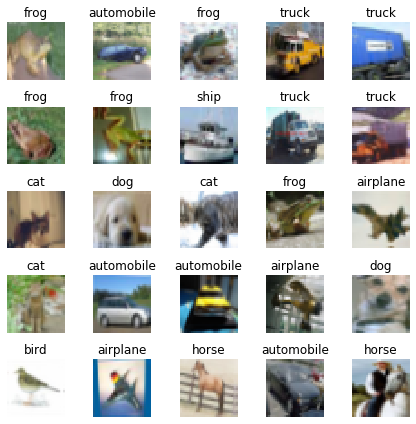

In [0]:
data.show_batch(figsize=(6,6))

In [0]:
results = pd.DataFrame()

## Pretrained Resnet34 Model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy], pretrained=True, callback_fns=[CSVLogger,ShowGraph])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


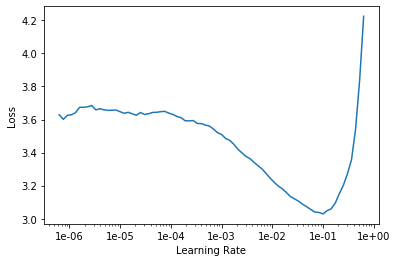

In [0]:
learn.lr_find()
learn.recorder.plot()

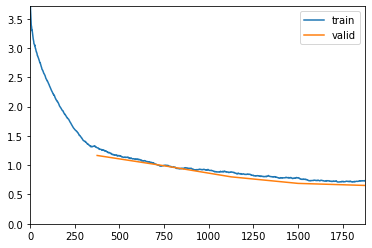

In [0]:
learn.fit_one_cycle(5,max_lr=1e-2)

In [0]:
results = results.append(pd.read_csv(path/'history.csv',usecols=['train_loss','valid_loss','accuracy']))

In [0]:
results

train_loss  valid_loss  accuracy
0    1.299677    1.165882  0.620750
1    0.998541    0.990291  0.671167
2    0.885245    0.801127  0.721583
3    0.785631    0.689487  0.760667
4    0.733769    0.654575  0.772417

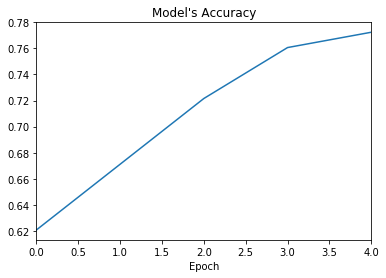

In [0]:
ax = results['accuracy'].plot(title='Model\'s Accuracy')
ax.set_xlabel("Epoch");

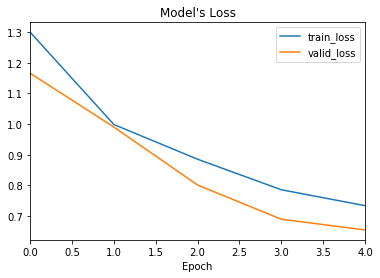

In [0]:
ax = results[['train_loss','valid_loss']].plot(title='Model\'s Loss')
ax.set_xlabel("Epoch");

In [0]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


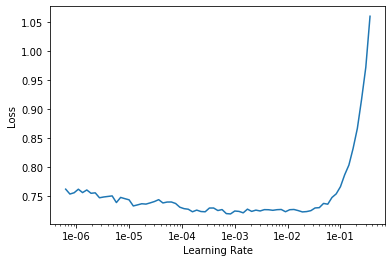

In [0]:
learn.lr_find()
learn.recorder.plot()

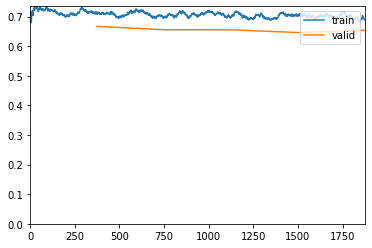

In [0]:
learn.fit_one_cycle(5,max_lr=1e-4)

In [0]:
results = results.append(pd.read_csv(path/'history.csv',usecols=['train_loss','valid_loss','accuracy']),ignore_index=True)

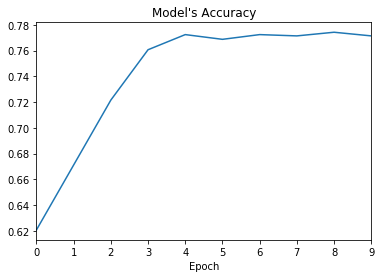

In [0]:
ax = results['accuracy'].plot(title='Model\'s Accuracy')
ax.set_xlabel("Epoch");

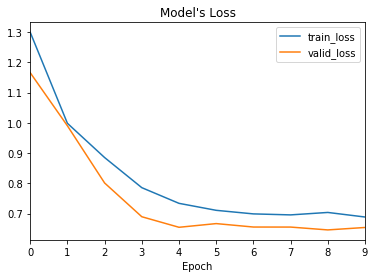

In [0]:
ax = results[['train_loss','valid_loss']].plot(title='Model\'s Loss')
ax.set_xlabel("Epoch");

In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


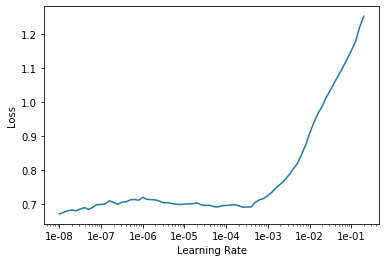

In [0]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot()

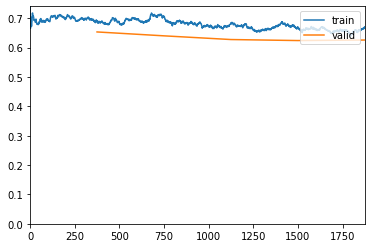

In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,3e-5))

In [0]:
results = results.append(pd.read_csv(path/'history.csv',usecols=['train_loss','valid_loss','accuracy']),ignore_index=True)

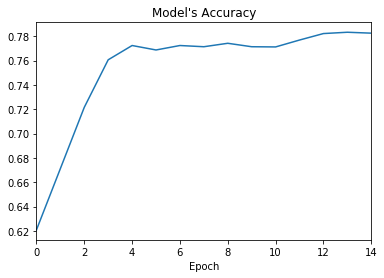

In [0]:
ax = results['accuracy'].plot(title='Model\'s Accuracy')
ax.set_xlabel("Epoch");

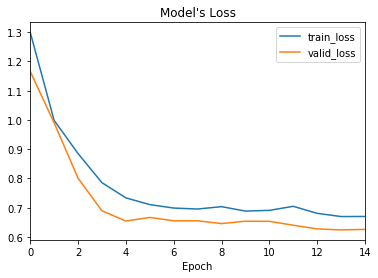

In [0]:
ax = results[['train_loss','valid_loss']].plot(title='Model\'s Loss')
ax.set_xlabel("Epoch");

In [0]:
learn.save('stage-3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


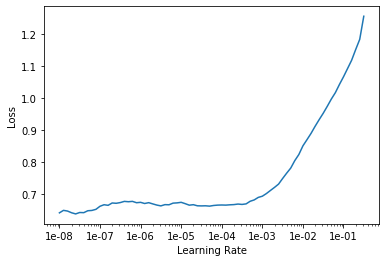

In [0]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot()

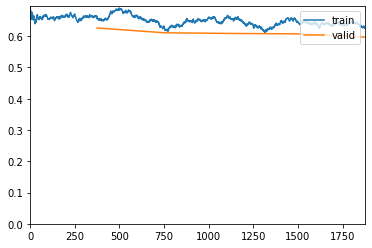

In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,3e-5))

In [0]:
results = results.append(pd.read_csv(path/'history.csv',usecols=['train_loss','valid_loss','accuracy']),ignore_index=True)

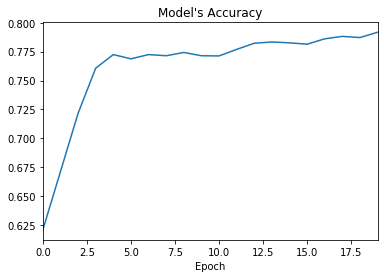

In [0]:
ax = results['accuracy'].plot(title='Model\'s Accuracy')
ax.set_xlabel("Epoch");

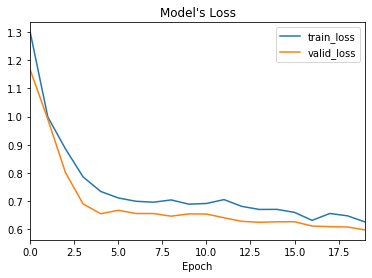

In [0]:
ax = results[['train_loss','valid_loss']].plot(title='Model\'s Loss')
ax.set_xlabel("Epoch");

In [0]:
learn.save('stage-4')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


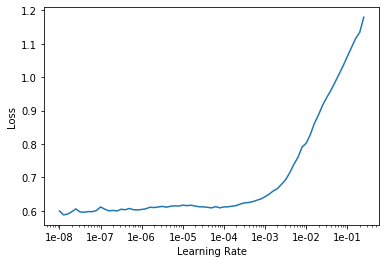

In [0]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot()

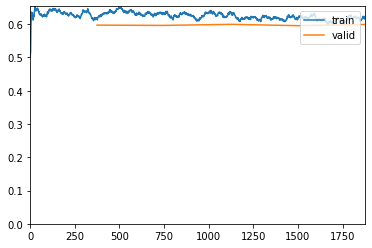

In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-5))

In [0]:
results = results.append(pd.read_csv(path/'history.csv',usecols=['train_loss','valid_loss','accuracy']),ignore_index=True)

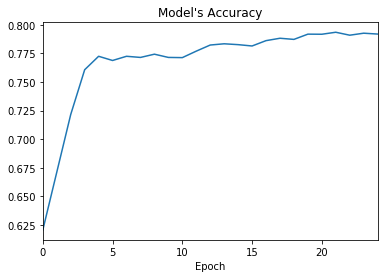

In [0]:
ax = results['accuracy'].plot(title='Model\'s Accuracy')
ax.set_xlabel("Epoch");

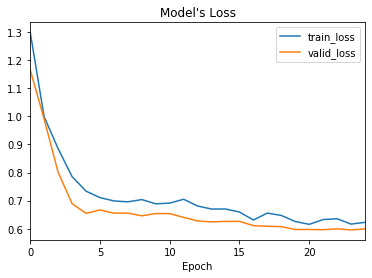

In [0]:
ax = results[['train_loss','valid_loss']].plot(title='Model\'s Loss')
ax.set_xlabel("Epoch");

In [0]:
learn.save('stage-5')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


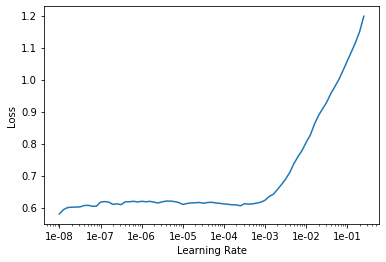

In [0]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot()

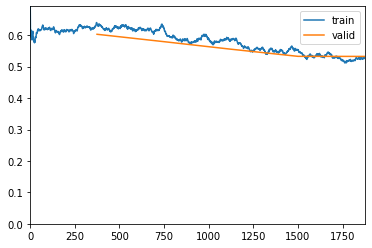

In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

In [0]:
results = results.append(pd.read_csv(path/'history.csv',usecols=['train_loss','valid_loss','accuracy']),ignore_index=True)

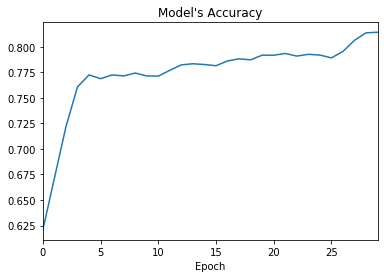

In [0]:
ax = results['accuracy'].plot(title='Model\'s Accuracy')
ax.set_xlabel("Epoch");

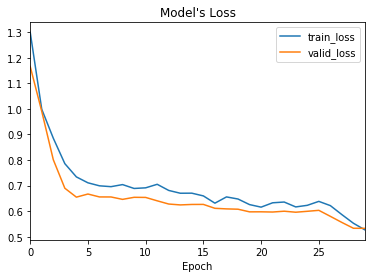

In [0]:
ax = results[['train_loss','valid_loss']].plot(title='Model\'s Loss')
ax.set_xlabel("Epoch");

In [0]:
learn.save('stage-6')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


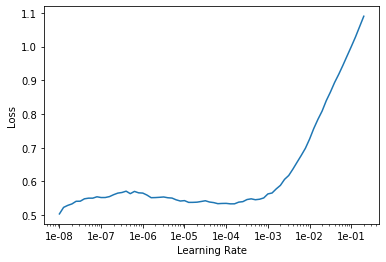

In [0]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot()

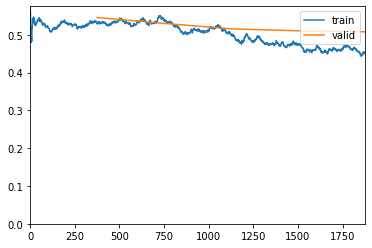

In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

In [0]:
results = results.append(pd.read_csv(path/'history.csv',usecols=['train_loss','valid_loss','accuracy']),ignore_index=True)

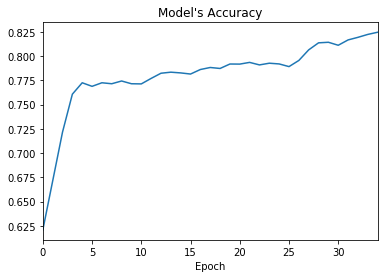

In [0]:
ax = results['accuracy'].plot(title='Model\'s Accuracy')
ax.set_xlabel("Epoch");

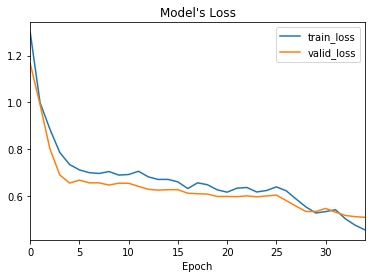

In [0]:
ax = results[['train_loss','valid_loss']].plot(title='Model\'s Loss')
ax.set_xlabel("Epoch");

In [0]:
learn.save('stage-7')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


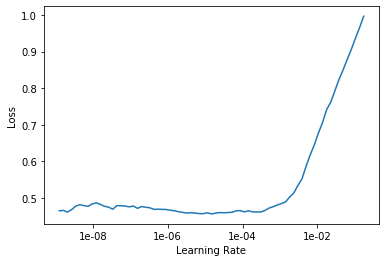

In [0]:
learn.lr_find(start_lr=1e-10)
learn.recorder.plot()

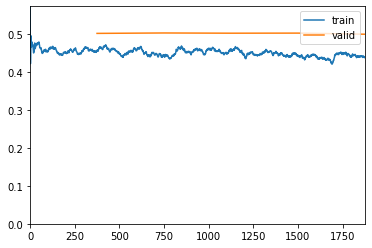

In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-5))

In [0]:
results = results.append(pd.read_csv(path/'history.csv',usecols=['train_loss','valid_loss','accuracy']),ignore_index=True)

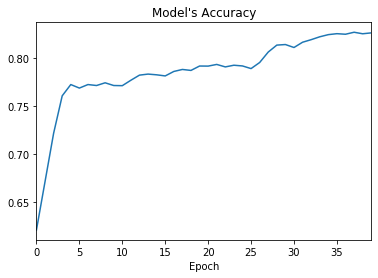

In [0]:
ax = results['accuracy'].plot(title='Model\'s Accuracy')
ax.set_xlabel("Epoch");

In [0]:
learn.save('stage-8')

In [0]:
learn.load('stage-8');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


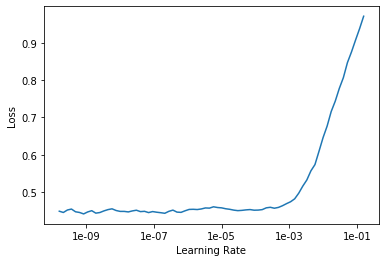

In [0]:
learn.lr_find(start_lr=1e-11)
learn.recorder.plot()

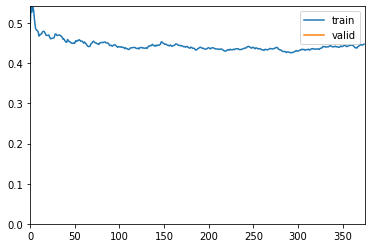

In [0]:
learn.fit_one_cycle(1,max_lr=slice(1e-8,1e-7))

In [0]:
results = results.append(pd.read_csv(path/'history.csv',usecols=['train_loss','valid_loss','accuracy']),ignore_index=True)

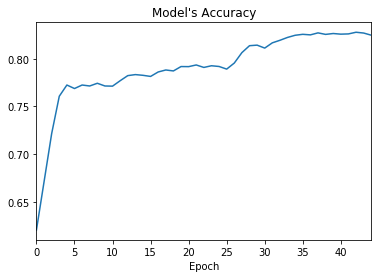

In [0]:
ax = results['accuracy'].plot(title='Model\'s Accuracy')
ax.set_xlabel("Epoch");

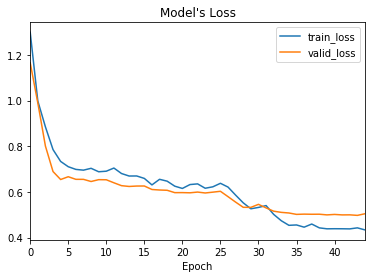

In [0]:
ax = results[['train_loss','valid_loss']].plot(title='Model\'s Loss')
ax.set_xlabel("Epoch");

In [0]:
learn.save('stage-9')

In [0]:
learn.load('stage-9');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


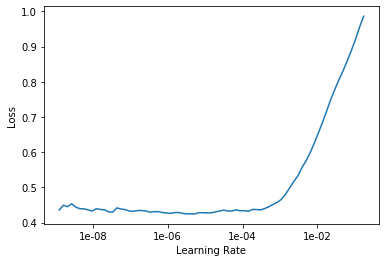

In [0]:
learn.lr_find(start_lr=1e-10)
learn.recorder.plot()

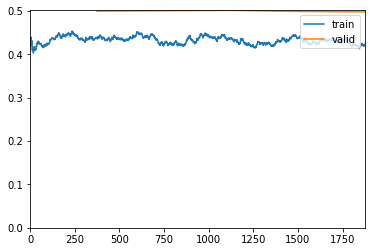

In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-7))

In [0]:
results = results.append(pd.read_csv(path/'history.csv',usecols=['train_loss','valid_loss','accuracy']),ignore_index=True)

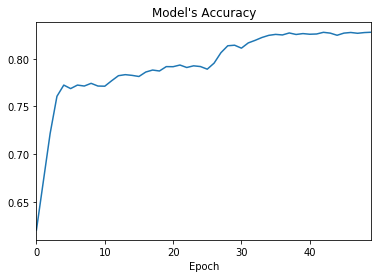

In [0]:
ax = results['accuracy'].plot(title='Model\'s Accuracy')
ax.set_xlabel("Epoch");

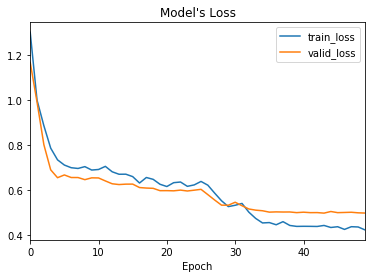

In [0]:
ax = results[['train_loss','valid_loss']].plot(title='Model\'s Loss')
ax.set_xlabel("Epoch");

In [0]:
learn.export('resnet34-acc.82775')

## Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

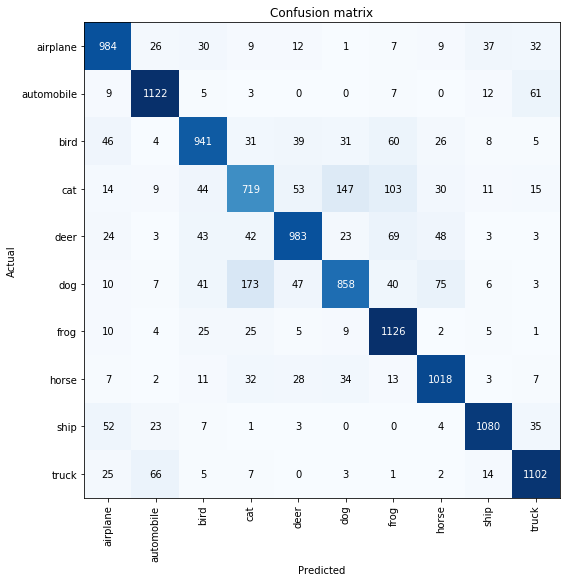

In [0]:
interp.plot_confusion_matrix(figsize=(8,8))

In [0]:
from fastai.widgets.class_confusion import ClassConfusion

In [0]:
ClassConfusion??

In [0]:
conf = ClassConfusion(interp,classlist=classes)

Please enter a value for `k`, or the top images you will see: 5


100%|██████████| 84/84 [02:03<00:00,  5.18s/it]


<Figure size 432x288 with 0 Axes>

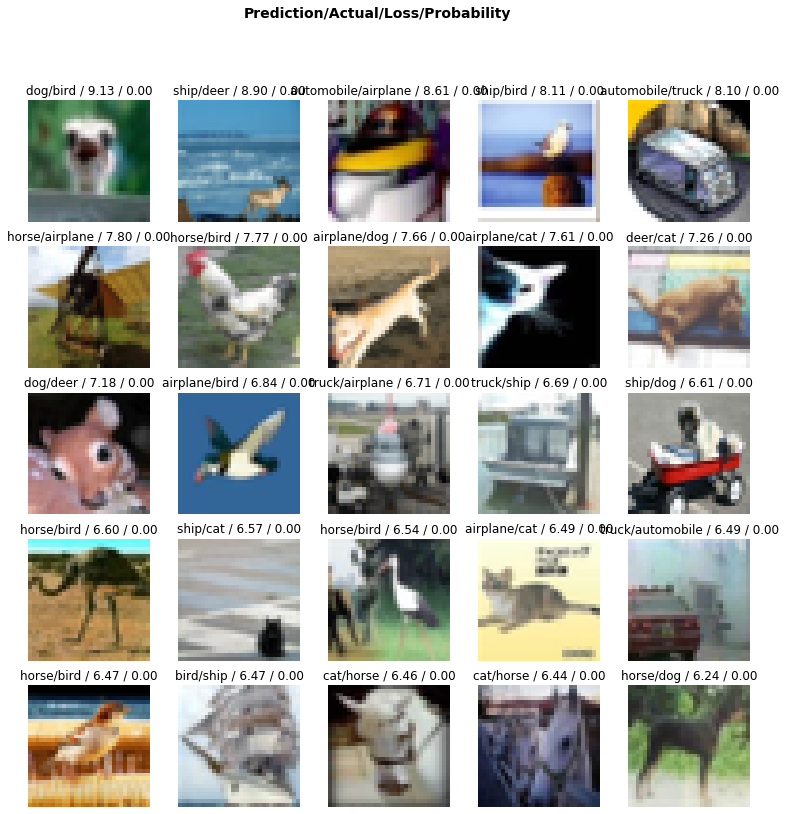

In [0]:
interp.plot_top_losses(25, figsize=(13,13))

In [0]:
interp.most_confused(min_val=10)

[('dog', 'cat', 173),
 ('cat', 'dog', 147),
 ('cat', 'frog', 103),
 ('dog', 'horse', 75),
 ('deer', 'frog', 69),
 ('truck', 'automobile', 66),
 ('automobile', 'truck', 61),
 ('bird', 'frog', 60),
 ('cat', 'deer', 53),
 ('ship', 'airplane', 52),
 ('deer', 'horse', 48),
 ('dog', 'deer', 47),
 ('bird', 'airplane', 46),
 ('cat', 'bird', 44),
 ('deer', 'bird', 43),
 ('deer', 'cat', 42),
 ('dog', 'bird', 41),
 ('dog', 'frog', 40),
 ('bird', 'deer', 39),
 ('airplane', 'ship', 37),
 ('ship', 'truck', 35),
 ('horse', 'dog', 34),
 ('airplane', 'truck', 32),
 ('horse', 'cat', 32),
 ('bird', 'cat', 31),
 ('bird', 'dog', 31),
 ('airplane', 'bird', 30),
 ('cat', 'horse', 30),
 ('horse', 'deer', 28),
 ('airplane', 'automobile', 26),
 ('bird', 'horse', 26),
 ('frog', 'bird', 25),
 ('frog', 'cat', 25),
 ('truck', 'airplane', 25),
 ('deer', 'airplane', 24),
 ('deer', 'dog', 23),
 ('ship', 'automobile', 23),
 ('cat', 'truck', 15),
 ('cat', 'airplane', 14),
 ('truck', 'ship', 14),
 ('horse', 'frog', 13),


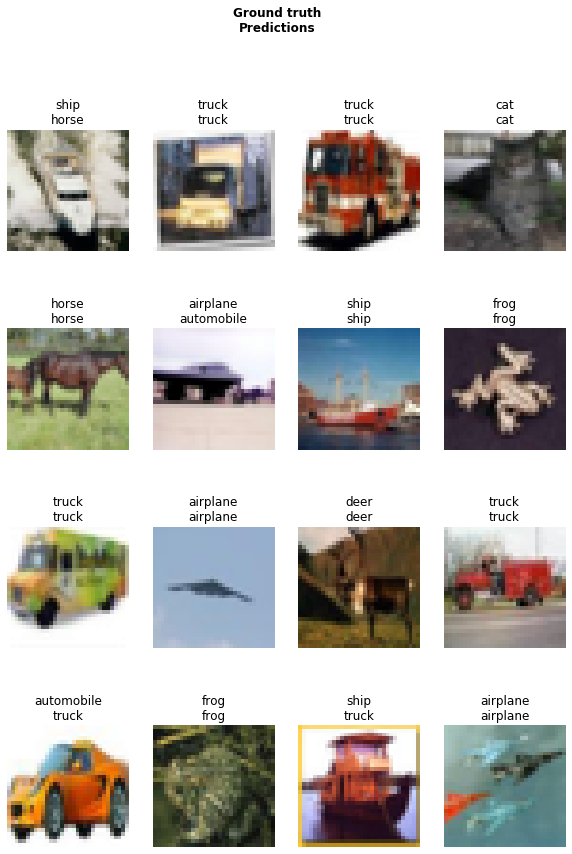

In [0]:
interp.learn.show_results(rows=4,figsize=(10,14))

## Inference

In [4]:
modelpath = Path('./cifar10/')

In [5]:
learn = load_learner(modelpath, file='resnet34-acc.82775', test=ImageList.from_folder(path/'test'))

In [6]:
learn.data

ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: cifar10;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: cifar10;

Test: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: cifar10

In [11]:
preds = learn.TTA(ds_type=DatasetType.Test)

In [32]:
preds = preds.argmax(dim=1)

In [44]:
classes = {
 0:'airplane',
 1:'automobile',
 2:'bird',
 3:'cat',
 4:'deer',
 5:'dog',
 6:'frog',
 7:'horse',
 8:'ship',
 9:'truck'
}

In [176]:
idxs = np.random.randint(0,len(preds),(10,))
xs = learn.data.test_ds.x[idxs]
zs = preds[idxs]

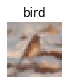

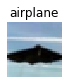

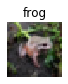

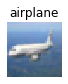

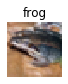

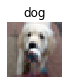

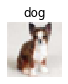

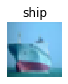

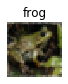

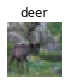

In [177]:
for i in range(10):
    xs[i].show(title=str(classes[int(zs[i])]),figsize=(1,1))

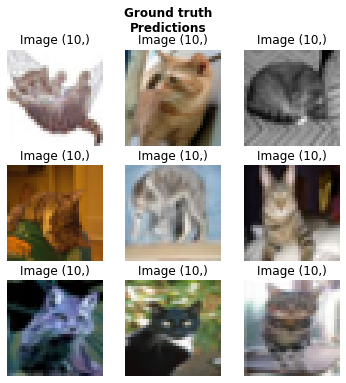

In [185]:
learn.show_results(rows=3,ds_type=DatasetType.Test,figsize=(6,6))

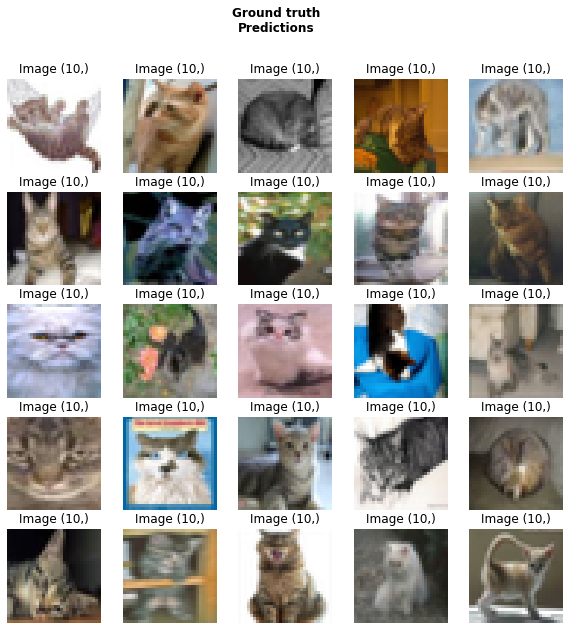

In [180]:
learn.show_results(ds_type=DatasetType.Test,figsize=(10,10),preds=preds)

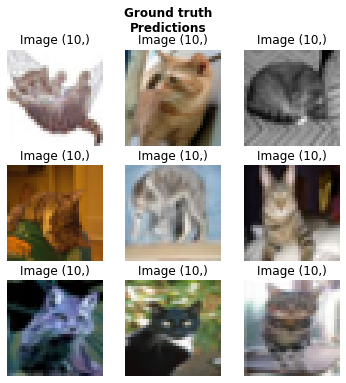

In [159]:
learn.show_results(rows=3,ds_type=DatasetType.Test,figsize=(6,6))

In [64]:
ax[0][0].plot(learn.data.test_dl)

(3, 3)

In [39]:
for i,ax in enumerate(ax):
    print(i,ax)

0 [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb19ddf9198>
1 [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb19d3f9d30>
2 [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb19d4faa20>
3 [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb19d337710>
4 [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb19d21c400>


In [0]:
learn.pred_batch(ds_type=DatasetType.Test)

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fb90d853b70>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


tensor([[6.8408e-01, 5.7007e-03, 5.3190e-02, 3.4258e-03, 7.4425e-03, 4.2081e-03,
         1.0031e-03, 7.4358e-02, 1.5332e-01, 1.3269e-02],
        [8.8712e-02, 1.3003e-03, 1.6897e-02, 6.2706e-03, 6.9148e-02, 3.8449e-03,
         3.3436e-04, 3.6343e-02, 7.7591e-01, 1.2452e-03],
        [7.0001e-01, 8.0732e-03, 4.3004e-02, 2.2150e-02, 2.9275e-02, 4.1997e-03,
         2.7561e-02, 1.8817e-03, 1.5634e-01, 7.5021e-03],
        [1.7121e-04, 2.6147e-05, 1.7973e-05, 2.6687e-05, 4.6262e-06, 4.4637e-06,
         8.9420e-06, 1.5052e-06, 9.9969e-01, 5.0907e-05],
        [3.7220e-02, 1.2537e-03, 1.3567e-02, 2.2394e-04, 7.6938e-05, 3.9906e-05,
         9.5503e-05, 3.1466e-05, 9.4732e-01, 1.7589e-04],
        [2.4263e-03, 5.2237e-02, 2.4334e-04, 1.2789e-04, 2.3181e-05, 5.9032e-05,
         1.4350e-03, 9.5051e-05, 9.4130e-01, 2.0526e-03],
        [1.8045e-03, 2.4069e-05, 2.0543e-04, 4.0256e-06, 2.1597e-06, 1.3024e-06,
         6.4138e-06, 1.5679e-06, 9.9794e-01, 1.2305e-05],
        [1.1888e-02, 8.7392

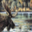

In [22]:
learn.data.test_ds[1000][0]

In [23]:
classes[int(preds[1000])]

'deer'

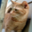

In [29]:
learn.data.test_ds[1][0]

In [32]:
classes[int(preds[1])],preds[1]

('cat', tensor(3))

In [0]:
preds = learn.pred_batch(ds_type=DatasetType.Test)

In [0]:
classes[preds]

TypeError: ignored

In [0]:
classes[preds.argmax(dim=1)[1].item()]

'ship'

In [28]:
learn.data.y

tensor([6, 3, 3,  ..., 8, 8, 8])

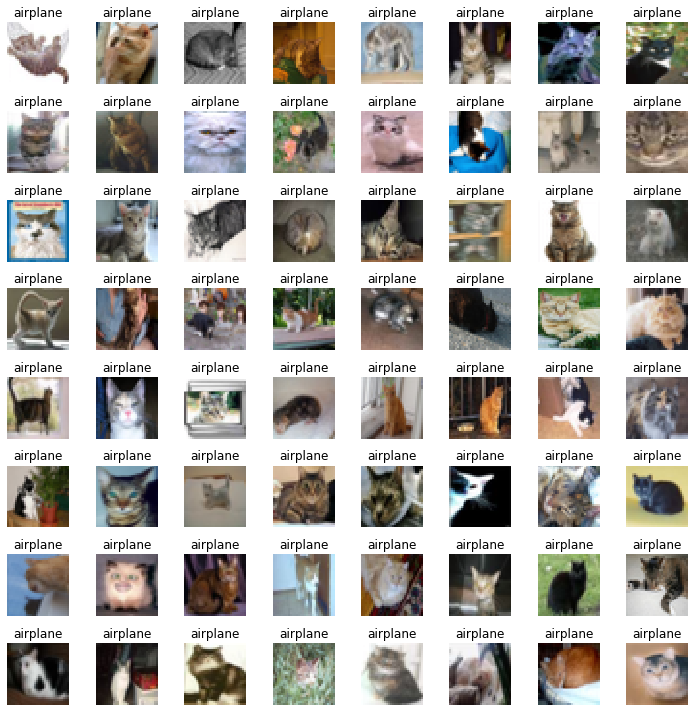

In [27]:
learn.data.show_batch(49,ds_type=DatasetType.Test,figsize=(10,10))

In [0]:
from google.colab import files

In [0]:
!ls -l '/root/.fastai/data/cifar10/models/'

total 2225952
-rw-r--r-- 1 root root  91813552 Dec 16 08:07 stage-1.pth
-rw-r--r-- 1 root root  91813527 Dec 16 08:16 stage-2.pth
-rw-r--r-- 1 root root 261966435 Dec 16 08:24 stage-3.pth
-rw-r--r-- 1 root root 261966485 Dec 16 08:33 stage-4.pth
-rw-r--r-- 1 root root 261966479 Dec 16 08:43 stage-5.pth
-rw-r--r-- 1 root root 261966467 Dec 16 08:53 stage-6.pth
-rw-r--r-- 1 root root 261966479 Dec 16 09:02 stage-7.pth
-rw-r--r-- 1 root root 261966473 Dec 16 09:13 stage-8.pth
-rw-r--r-- 1 root root 261966483 Dec 16 09:26 stage-9.pth
-rw-r--r-- 1 root root 261966324 Dec 16 10:38 tmp.pth


In [0]:
!ls -l '/root/.fastai/data/cifar10/'

total 85380
-rw-r--r--  1 root root      217 Dec 16 10:46 history.csv
-rw-r--r--  1 1001 1001       60 Nov 18  2016 labels.txt
drwxr-xr-x  2 root root     4096 Dec 16 10:38 models
-rw-r--r--  1 root root 87407208 Dec 16 10:48 resnet34-acc.82775
drwxr-xr-x 12 1001 1001     4096 Nov 15  2017 test
drwxr-xr-x 12 1001 1001     4096 Nov 15  2017 train


In [0]:
files.download('/root/.fastai/data/cifar10/resnet34-acc.82775')

In [0]:
files.download('/root/.fastai/data/cifar10/resnet34-acc.82775')